In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [132]:
train_df = pd.read_csv(r"C:\Users\Tyusha Sarawagi\Documents\applied_data_science\final_project_train.csv")
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [133]:
test_df = pd.read_csv(r"C:\Users\Tyusha Sarawagi\Documents\applied_data_science\final_project_test.csv")
test_df.head()


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## EDA

#### Word Cloud


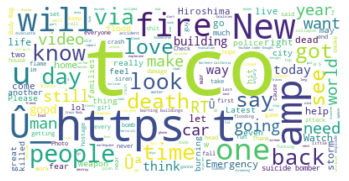

In [193]:
# word cloud 

text = " ".join(review for review in df.text)

stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Bar Graph

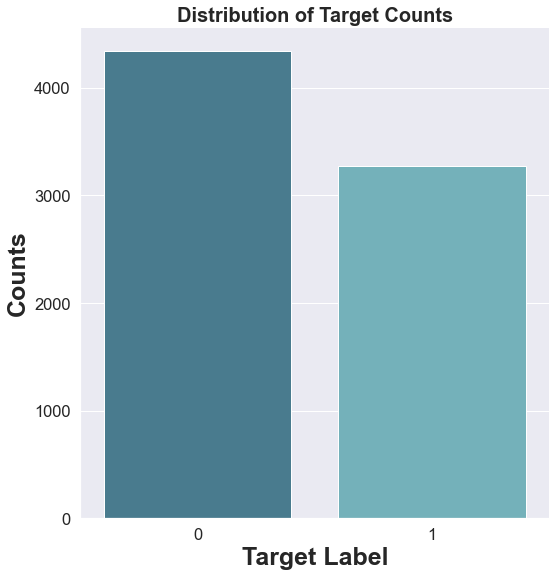

In [194]:
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1.5)
pal = sns.color_palette("GnBu_d", len(data))

sns.catplot("target", data=df, kind = "count",height=8, palette=np.array(pal[::-1]))
data = df.groupby("target").size()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data))


plt.title("Distribution of Target Counts", size=20, weight="bold")
plt.xlabel("Target Label", size=25, weight="bold")
plt.ylabel("Counts", size=25, weight="bold")


plt.show()


### Map

In [195]:
pd.set_option('display.max_rows', None)

locations= df["location"].value_counts().sort_values(ascending=False)

locations

USA                                                  104
New York                                              71
United States                                         50
London                                                45
Canada                                                29
Nigeria                                               28
UK                                                    27
Los Angeles, CA                                       26
India                                                 24
Mumbai                                                22
Washington, DC                                        21
Kenya                                                 20
Worldwide                                             19
Australia                                             18
Chicago, IL                                           18
California                                            17
Everywhere                                            15
New York, NY                   

In [196]:
# replacing some names from locations to be all countries
replace_names= {
    "USA":"United States",
    "New York":"United States",
    "Los Angeles": "United States",
    "Los Angeles, CA":"United States",
    "Washington, DC": "United States",
    "San Francisco": "United States",
    "San Francisco, CA": "United States",
    "Chicago, IL": "United States",
    "Chicago": "United States",
    "New York, NY": "United States",
    "NYC": "United States",
    "Florida": "United States",
    "London": "UK",
    "United Kingdom": "UK",
    "Mumbai": "India",
    "California": "United States",
    "California, USA": "United States",
    "Toronto": "Canada",
    "Washington, D.C.": "United States",
    "Everywhere": "Worldwide",
    "Seattle": "United States",
    "ss": "Worldwide"
}

countries = df["location"].replace(replace_names).value_counts().sort_values(ascending=False)
countries_df= pd.DataFrame(dict(zip(countries.index, countries.values)), index=[0]).\
                                melt(var_name="country", value_name="unique_counts")
# Note: Counts may not be accurate because not all area's have been replaced! 
countries_df.loc[:10]


,country,unique_counts
0,United States,436
1,UK,86
2,India,46
3,Worldwide,44
4,Canada,41
5,Nigeria,28
6,Kenya,20
7,Australia,18
8,Indonesia,13
9,Ireland,12


In [197]:
data = {
    "locations": countries_df.loc[:10, "country"],
    "locationmode": "country names",
    "z": countries_df.loc[:10, "unique_counts"],
    "colorscale": "rainbow",
    "text": countries_df.loc[:10, "country"],
    "type": "choropleth",
    "colorbar": {"title": "Unique Counts", "len": 200, "lenmode":"pixels"}
}

layout = go.Layout(title_text= "<b>Tweet Locations of Top 10 Countries</b>",
                   geo= dict(scope= "world"))

fig = go.Figure(data=[data], layout=layout)
fig.update_layout(title_x=0.9)
fig.show()


## Preprocessing

In [135]:
#remove strings 
import string


In [136]:
sample = "! Residents Return To Destroyed Homes As Washington Wildfire Burns on http://t.co/UcI8stQUg1"
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
nopunc = [c for c in sample if c not in string.punctuation]


In [138]:
#remove stopwords
#!pip install nltk
#!pip install stopwords
#nltk.download('stopwords')

import nltk 
import stopwords
from nltk.corpus import stopwords


In [139]:
#lists all english "stop-words"
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [140]:
nopunc = ''.join(nopunc)
#the finished string without stopwords or punctuation 
nopunc


' Residents Return To Destroyed Homes As Washington Wildfire Burns on httptcoUcI8stQUg1'

In [141]:
#split sting into list of strings 
nopunc.split()


['Residents',
 'Return',
 'To',
 'Destroyed',
 'Homes',
 'As',
 'Washington',
 'Wildfire',
 'Burns',
 'on',
 'httptcoUcI8stQUg1']

In [142]:
#for words in the list seperated make them lowercase to check if its a stopword and remove it. 
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess


['Residents',
 'Return',
 'Destroyed',
 'Homes',
 'Washington',
 'Wildfire',
 'Burns',
 'httptcoUcI8stQUg1']

In [143]:
#nltk.download('averaged_perceptron_tagger')
tagged_mess = nltk.pos_tag(clean_mess)


In [144]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(plural) for plural in clean_mess]
#print(' '.join(singles))


['resid',
 'return',
 'destroy',
 'home',
 'washington',
 'wildfir',
 'burn',
 'httptcouci8stqug1']

In [145]:
#tokenize this so that we only have the words we want (tokens)
def text_process(mess):
    '''
    1. remove puncuation 
    2. remove stop words
    3. return a list of clean text words 
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [146]:
#tokenize this so that we only have the words we want (tokens)
def text_process(mess):
    '''
    1. remove puncuation 
    2. remove stop words
    3. return a list of clean text words 
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #new 
    stopped = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    
    return nltk.pos_tag(stopped)


In [147]:
train_df['text'].head(5).apply(text_process)


0    [(Deeds, NNP), (Reason, NNP), (earthquake, NN)...
1    [(Forest, NNP), (fire, NN), (near, IN), (La, N...
2    [(residents, NNS), (asked, VBD), (shelter, JJ)...
3    [(13000, CD), (people, NNS), (receive, JJ), (w...
4    [(got, VBD), (sent, JJ), (photo, NN), (Ruby, N...
Name: text, dtype: object

In [148]:
#this is the part where we tokenize the data so that  we only have the words we want (tokens)

#!pip install nltk
#!pip install stopwords
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('stopwords')

import string
import nltk 
import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import PorterStemmer

'''
    https://datascience.stackexchange.com/questions/31413/how-to-improve-naive-bayes
    1. remove puncuation #
    2. Lowercase strings #
    3. remove stop words#
    4. part of speech tagging #
    5. lemetize strings #
    **6. spelling mistakes 
    7. return a list of clean text words / tokenize #
'''
def full_text_process(mess):
    
    #lower casing string 
    mess = mess.lower().split()
    
    #removing puncutation 
    nopunc = [char for char in mess if char not in string.punctuation]
    #nopunc = ''.join(nopunc)
    
    #stop words 
    stopped = [word for word in nopunc if word not in stopwords.words('english')]
    
    #stemming 
    stemmer = PorterStemmer()
    stemmer = [stemmer.stem(plural) for plural in stopped]
    
    ##pos tagging 
    return nltk.pos_tag(stemmer)


In [220]:
from nltk.corpus import stopwords

def full_text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    """
    # remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # convert string to lowercase and tokenize
    tokens = word_tokenize(nopunc.lower())

    # remove stopwords
    stopped = [word for word in tokens if word not in stopwords.words('english')]

    # stem words
    stemmed = [stemmer.stem(word) for word in stopped]

    return stemmed


In [149]:
train_df['text'].head(5)


0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [150]:
train_df['text'].head(5).apply(full_text_process)


0    [(deed, NN), (reason, NN), (#earthquak, NN), (...
1    [(forest, JJS), (fire, NN), (near, IN), (la, N...
2    [(resid, NN), (ask, NN), ('shelter, POS), (pla...
3    [(13,000, CD), (peopl, JJ), (receiv, NN), (#wi...
4    [(got, VBD), (sent, JJ), (photo, NN), (rubi, N...
Name: text, dtype: object

 ## Use NLTK to normalize and process this data
Stemming vs. Leminization.
We will come back to this latter an apply some of thoes processes.

 ## Vectorization
We are using the bag of words model to: 1. count how many times a word occurs in each model (term frequency) 2. weigh the counts so that the frequency tokens get a lower weight (inverse document frequency) 3. normalize the vectors to unit length to abstract from the original text length (L2 norm)



In [151]:
#eachh col is 1 messahe and each row is a word. - bag of words 
# sparse matrix - matrixes with several 0 values 

from sklearn.feature_extraction.text import CountVectorizer


In [152]:
bow_transformer = CountVectorizer(analyzer= full_text_process).fit(train_df['text'])
print(len(bow_transformer.vocabulary_))


29935


In [153]:
mess4 = train_df['text'][3]
print(mess4)


13,000 people receive #wildfires evacuation orders in California 


In [154]:
bow4 = bow_transformer.transform([mess4])
print(bow4)


  (0, 2122)	1
  (0, 3308)	1
  (0, 8945)	1
  (0, 11917)	1
  (0, 22867)	1
  (0, 23316)	1
  (0, 24419)	1


In [155]:
print(bow4.shape) 
#there are 7 unique words in our data sets text col  
#all words only apper once 


(1, 29935)


In [156]:
bow_transformer.get_feature_names()[14502] #at 0,14502 index 


('http://t.co/2acrgdqhj0', 'NN')

In [157]:
text_bow = bow_transformer.transform(train_df['text'])


In [158]:
print('Shape of Sparse Matrix: ', text_bow.shape)


Shape of Sparse Matrix:  (7613, 29935)


In [159]:
#the number of non-zero occurances 
text_bow.nnz #75006 of our text are non-zero 


76642

In [160]:
#formula: 
sparsity = (100.00 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('Sparsity: {}'.format(sparsity)) #the number of non-zero messages to total messages


Sparsity: 0.033630377091606004


In [161]:
from sklearn.feature_extraction.text import TfidfTransformer


In [162]:
tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)


In [163]:
print(tfidf4)
#we now have the inverse document and term frequency relationship for the speific mesage
#weight value for each word vs actual document 


  (0, 24419)	0.4479391166547422
  (0, 23316)	0.3586415832032062
  (0, 22867)	0.3300127170825552
  (0, 11917)	0.2937045177511124
  (0, 8945)	0.291676587371102
  (0, 3308)	0.4842473159861849
  (0, 2122)	0.394949782534649


In [164]:
text_tfidf = tfidf_transformer.transform(text_bow)


## Split Train and Test Data

In [165]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
txt_train, txt_test, target_train, target_test = train_test_split(train_df['text'], train_df['target'], test_size = 0.3)


#data pipeline feature: 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = full_text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB())
])

pipeline.fit(train_df['text'], train_df['target'])


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function full_text_process at 0x000001DDAD339B80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [166]:
predictions = pipeline.predict(test_df['text'])
predictions


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [167]:
from sklearn.metrics import classification_report


In [168]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_labels = label_encoder.fit_transform(test_df['text'])

print(classification_report(test_labels, predictions))



              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

In [169]:
from sklearn import metrics
metrics.confusion_matrix(test_labels, predictions)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [170]:
from sklearn.ensemble import RandomForestClassifier


In [171]:
#data pipeline feature: 
from sklearn.pipeline import Pipeline 
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer = full_text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', RandomForestClassifier())
])


In [172]:
pipeline2.fit(train_df['text'], train_df['target'])


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function full_text_process at 0x000001DDAD339B80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [173]:
predictions2 = pipeline2.predict(test_df['text'])
predictions2


array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [174]:
from sklearn.metrics import classification_report


In [175]:
#to check the accuracy use this code. But since we dont have the results, I think we are just guessing. 
print(classification_report(predictions, test_labels))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2245
           1       0.00      0.00      0.00      1018
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [176]:
submission = pd.DataFrame(predictions, columns=['target'])
submission.index = test_df['text']
submission.to_csv('MBRegression_submission.csv')


In [177]:
submission2 = pd.DataFrame(predictions2, columns=['target'])
submission2.index = test_df['text']
submission2.to_csv('RandomForrest_submission2.csv')


## Splitting for Accuracy

In order to see the accuracy of the model we are splitting the data by 35%



In [212]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
txt_train, txt_test, target_train, target_test = train_test_split(train_df['text'], train_df['target'], test_size = 0.3)


In [221]:
pipeline.fit(txt_train, target_train)
predictions = pipeline.predict(txt_test)


In [222]:
predictions = pipeline.predict(txt_test)
predictions


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [223]:
#from sklearn import metrics
#metrics.confusion_matrix(target_test, predictions)
#print(classification_report(test_df['text'], predictions))
print(classification_report(target_test, predictions))


              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1305
           1       0.85      0.61      0.71       979

    accuracy                           0.79      2284
   macro avg       0.81      0.77      0.77      2284
weighted avg       0.80      0.79      0.78      2284



In [224]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


In [225]:
cm = confusion_matrix(y_true=target_test, y_pred=predictions)
cm


array([[1203,  102],
       [ 382,  597]], dtype=int64)

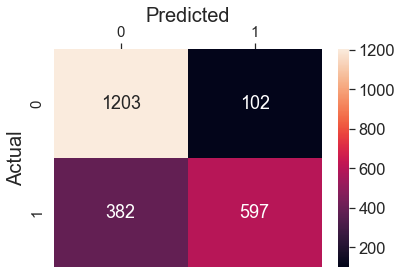

In [226]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 15)
plt.show()
